In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)
rc('patch', linewidth=linewidth)
rc('hatch', linewidth=linewidth)

In [124]:
cell_tidy_data = pd.read_hdf(
    '/home/hanliu/project/mouse_rostral_brain/study/ITSpatial-DissectionRegion/ITSpatial.cell_tidy_data.hdf'
)

gene_rate = pd.read_hdf('ITSpatial.GeneWithSlop2kb.gene_da_rate.group_center.hdf')

gene_meta = pd.read_csv(
    '/home/hanliu/ref/mouse/gencode/vm22/gencode.vM22.annotation.gene.flat.tsv.gz',
    sep='\t',
    index_col='gene_id')
gene_name_to_id = {v: k for k, v in gene_meta['gene_name'].items()}


cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()


In [125]:
region_to_name = cell_tidy_data.set_index('Region')['RegionName'].to_dict()
region_name_palette = {region_to_name[k]: v for k, v in region_palette.items() if k in region_to_name}

In [137]:
region_coords = {
    'ACA-1': [0, 4],
    'ACA-2': [0, 5],
    'ACA-3': [0, 6],
    'AI': [3, 3],
    'MOp-1': [2, 2],
    'MOp-2': [2, 3],
    'MOp-3': [2, 4],
    'MOp-4': [2, 5],
    'MOs-1': [1, 1],
    'MOs-2': [1, 2],
    'MOs-3': [1, 3],
    'ORB': [0, 1],
    'PFC-1': [0, 2],
    'PFC-2': [0, 3],
    'SSp-1': [3, 4],
    'SSp-2': [3, 5],
    'SSp-3': [3, 6],
    'SSp-4': [3, 7],
    'SSp-5': [3, 8],
    'SSs-1': [4, 5],
    'SSs-2': [4, 6]
}

region_table = pd.DataFrame(region_coords, index=['x', 'y']).T
region_table.index.name = 'RegionName'
region_table.reset_index(inplace=True)

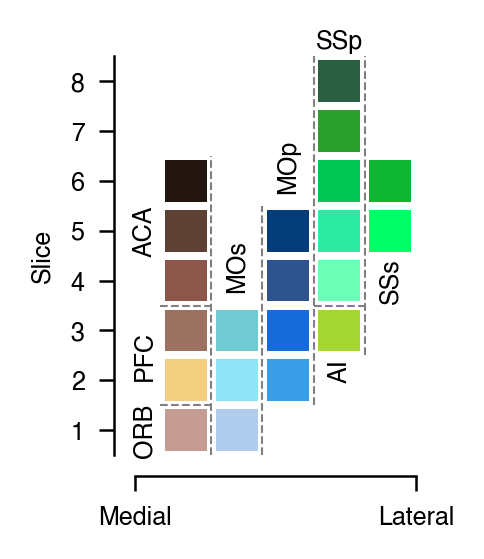

In [233]:
scale = 0.22

fig, ax = plt.subplots(figsize=(5.5*scale, 8*scale), dpi=300)

sns.scatterplot(ax=ax,
                data=region_table,
                x='x',
                y='y',
                marker='s',
                hue='RegionName',
                palette=region_name_palette,
                s=100,
                linewidth=0, legend=None)
ax.set(xlim=(-1, 4.5), ylim=(0.5, 8.5), 
       yticks=range(1, 9), ylabel='Slice',
       xticks=[-1, 4.5], xticklabels=['Medial', 'Lateral'], xlabel='')

# region boarders
c = 'gray'
ax.plot((-0.5, 0.5), (1.5, 1.5), linewidth=0.5, linestyle='--', color=c)
ax.plot((-.5, .5), (3.5, 3.5), linewidth=0.5, linestyle='--', color=c)
ax.plot((2.5, 3.5), (3.5, 3.5), linewidth=0.5, linestyle='--', color=c)
ax.plot((0.5, 0.5), (.5, 6.5), linewidth=0.5, linestyle='--', color=c)
ax.plot((1.5, 1.5), (.5, 5.5), linewidth=0.5, linestyle='--', color=c)
ax.plot((2.5, 2.5), (1.5, 8.5), linewidth=0.5, linestyle='--', color=c)
ax.plot((3.5, 3.5), (2.5, 8.5), linewidth=0.5, linestyle='--', color=c)

# text label
ax.text(-0.8, 1, 'ORB', ha='center', va='center', rotation=90, fontsize=labelsize)
ax.text(-0.8, 2.5, 'PFC', ha='center', va='center', rotation=90, fontsize=labelsize)
ax.text(-0.8, 5, 'ACA', ha='center', va='center', rotation=90, fontsize=labelsize)
ax.text(1, 4.3, 'MOs', ha='center', va='center', rotation=90, fontsize=labelsize)
ax.text(2, 6.3, 'MOp', ha='center', va='center', rotation=90, fontsize=labelsize)
ax.text(3, 2.2, 'AI', ha='center', va='center', rotation=90, fontsize=labelsize)
ax.text(3, 8.8, 'SSp', ha='center', va='center', fontsize=labelsize, clip_on=False)
ax.text(4, 4, 'SSs', ha='center', va='center', rotation=90, fontsize=labelsize)

sns.despine(ax=ax, offset=5)

fig.savefig('RegionLayout.color_by_region.pdf')

In [262]:
def plot_gene(ax, gene_name='Cux2', layer='IT-L23', hue_norm=(0.3, 1), label=True): 
    gene_id = gene_name_to_id[gene_name]
    this_rate = gene_rate[gene_id]
    this_rate = this_rate[this_rate.index.str.startswith(layer)].copy()
    this_rate.index = this_rate.index.map(lambda i: i.split('+')[1])
    
    gene_table = region_table.set_index('RegionName')
    gene_table[gene_name] = this_rate
    gene_table.reset_index(inplace=True)
    
    sns.scatterplot(ax=ax,
                    data=gene_table,
                    x='x',
                    y='y',
                    marker='s',
                    hue=gene_name,
                    palette='viridis',
                    hue_norm=hue_norm,
                    s=50,
                    linewidth=0, legend=None)
    ax.set(xlim=(-1, 4.5), ylim=(0.5, 8.5), 
           yticks=range(1, 9), ylabel='Slice',
           xticks=[-1, 4.5], xticklabels=['Medial', 'Lateral'], xlabel='')
    ax.set_title(gene_name, fontsize=labelsize)
    
    # if has nan
    for _, (_, x, y, _) in gene_table[gene_table[gene_name].isna()].iterrows():
        delta = 0.4
        ax.fill([x-delta, x+delta, x+delta, x-delta], 
                [y-delta, y-delta, y+delta, y+delta], 
                fill=False, hatch='//////', color='lightgray')
    
    # region boarders
    c = 'gray'
    ax.plot((-0.5, 0.5), (1.5, 1.5), linewidth=0.5, linestyle='--', color=c)
    ax.plot((-.5, .5), (3.5, 3.5), linewidth=0.5, linestyle='--', color=c)
    ax.plot((2.5, 3.5), (3.5, 3.5), linewidth=0.5, linestyle='--', color=c)
    ax.plot((0.5, 0.5), (.5, 6.5), linewidth=0.5, linestyle='--', color=c)
    ax.plot((1.5, 1.5), (.5, 5.5), linewidth=0.5, linestyle='--', color=c)
    ax.plot((2.5, 2.5), (1.5, 8.5), linewidth=0.5, linestyle='--', color=c)
    ax.plot((3.5, 3.5), (2.5, 8.5), linewidth=0.5, linestyle='--', color=c)
    
    if label:
        # text label
        ax.text(-0.8, 1, 'ORB', ha='center', va='center', rotation=90, fontsize=labelsize)
        ax.text(-0.8, 2.5, 'PFC', ha='center', va='center', rotation=90, fontsize=labelsize)
        ax.text(-0.8, 5, 'ACA', ha='center', va='center', rotation=90, fontsize=labelsize)
        ax.text(1, 4.3, 'MOs', ha='center', va='center', rotation=90, fontsize=labelsize)
        ax.text(2, 6.3, 'MOp', ha='center', va='center', rotation=90, fontsize=labelsize)
        ax.text(3, 2.2, 'AI', ha='center', va='center', rotation=90, fontsize=labelsize)
        ax.text(3, 8.8, 'SSp', ha='center', va='center', fontsize=labelsize, clip_on=False)
        ax.text(4, 4, 'SSs', ha='center', va='center', rotation=90, fontsize=labelsize)
    sns.despine(ax=ax, offset=3)
    return ax

## Plot 4 layers

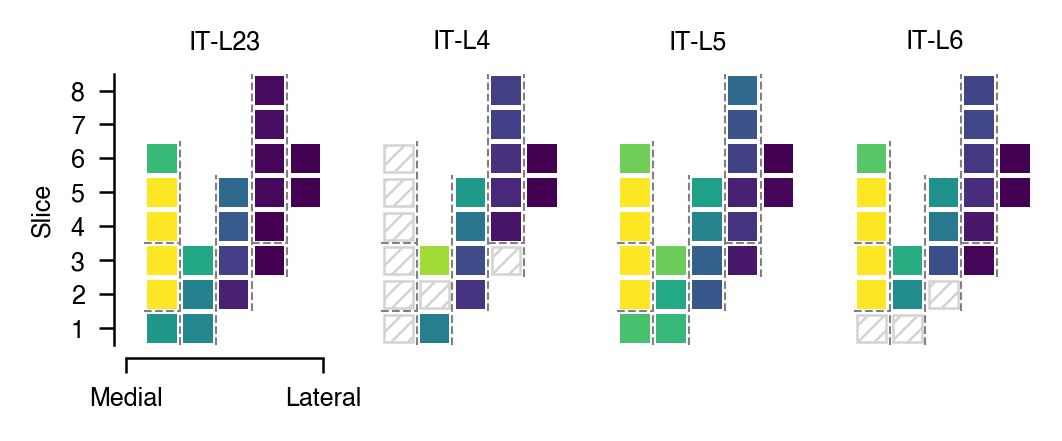

In [279]:
scale = 0.15
ncols = 4
fig, axes = plt.subplots(figsize=(6.5*scale*ncols, 8*scale), ncols=ncols, dpi=300)

gene = 'Zic4'
layers = ['IT-L23', 'IT-L4', 'IT-L5', 'IT-L6']
for layer, ax in zip(layers, axes.flat):
    if ax.is_first_col():
        ax = plot_gene(ax=ax, gene_name=gene, 
                       layer=layer, hue_norm=(0.5, 1.5), label=False)
    else:
        ax = plot_gene(ax=ax, gene_name=gene, 
                       layer=layer, hue_norm=(0.5, 1.5), label=False)
        ax.axis('off')
    ax.set_title(layer, fontsize=labelsize)
    